In [6]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [7]:

# Реализация epsilon - greedy algorithm

def one_game(N_arm, n_step, epsilon, Start_Q_value=0):
    q_star = np.random.normal(0, 1, N_arm)  # stationary expected values
    optimal_action = np.argmax(q_star, axis=0)

    Q = Start_Q_value * np.ones(N_arm)
    N = np.zeros(N_arm)

    actions_opt = np.zeros(n_step)
    reward = np.zeros(n_step)

    for step in range(0, n_step):
        greedy_action = np.argmax(Q)
        random_action = np.random.randint(0, N_arm - 1)
        a = np.random.choice([greedy_action, random_action], p=[1 - epsilon, epsilon])
        reward[step] = np.random.normal(q_star[a], 1)
        actions_opt[step] = (a == optimal_action)
        N[a] += 1
        Q[a] += (1 / N[a]) * (reward[step] - Q[a])
    return reward, actions_opt

def n_game(N_arm, n_step, epsilon, N_games, Start_Q_value=0):
    avg_rew = []
    avg_opt_act = []
    for game in range(N_games):
        a, b = one_game(N_arm, n_step, epsilon)
        avg_rew.append(a)
        avg_opt_act.append(b)
    return avg_rew, avg_opt_act





In [8]:
N_arm = 10
n_step = 1000
N_games = 2000

avg_rew01, per_opt01 = n_game(N_arm, n_step, 0.1, N_games)
avg_rew001, per_opt001 = n_game(N_arm, n_step, 0.01, N_games)
avg_rew_greedy, per_opt_greedy = n_game(N_arm, n_step, 0, N_games)

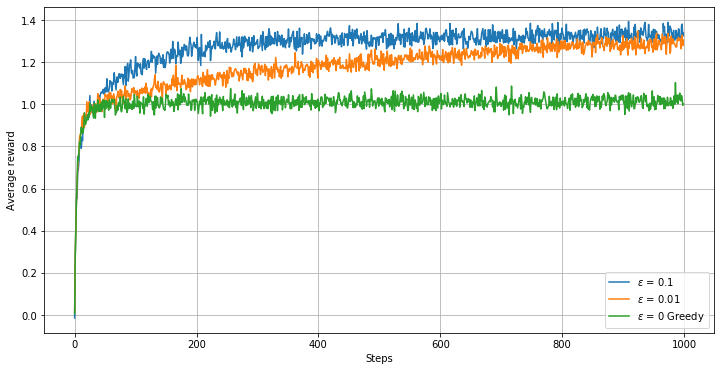

In [9]:
figsize=(12, 6)
plt.figure(figsize=figsize)
pl1 = plt.plot(np.mean(avg_rew01, axis=0), label='$\epsilon$ = 0.1')
pl2 = plt.plot(np.mean(avg_rew001, axis=0), label='$\epsilon$ = 0.01')
pl3 = plt.plot(np.mean(avg_rew_greedy, axis=0), label='$\epsilon$ = 0 Greedy')
plt.legend()
plt.grid(True)
plt.ylabel("Average reward")
plt.xlabel("Steps")
plt.show()